In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from imu_preprocessor import*
import re
import ast

In [40]:
# 1. Define a tiny parser that converts "ClassName(key=val)" to a dictionary
class ROSParser(dict):
    def __init__(self, *args, **kwargs):
        super().__init__(kwargs if kwargs else {"values": args[0]} if args else {})

def parse_ros_str(s):
    try:
        # Replaces 'ClassName(' with 'ROSParser(' so eval() creates dictionaries
        clean_s = re.sub(r'(?<!\w)[\w.]+\(', 'ROSParser(', s)
        return eval(clean_s, {"ROSParser": ROSParser, "__builtins__": {}})
    except:
        return s
    
# 1. Helper to safely convert string representation of lists/dicts to Python objects
def parse_col(val):
    try:
        return ast.literal_eval(val)
    except:
        return val

In [29]:
# name_list = [path + seq0_path + '/_imu.csv',
#              path + seq1_path + '/_imu.csv',
#              path + seq2_path + '/_imu.csv',
#              path + seq0_path + '/_joint_states.csv',
#              path + seq1_path + '/_joint_states.csv',
#              path + seq2_path + '/_joint_states.csv',
#              path + seq0_path + '/_scan.csv',
#              path + seq1_path + '/_scan.csv',
#              path + seq2_path + '/_scan.csv',]

# for name in name_list[1:]:
#     df = pd.read_csv(name)
#     data_extracted = df['data'].apply(parse_ros_str).apply(pd.Series)
#     df_final = pd.concat([df.drop(columns=['data']), data_extracted], axis=1)
#     df_final.to_csv(name, index=False)

In [19]:
# # Apply parsing and expand top-level keys into columns
# data_extracted = seq0_imu['data'].apply(parse_ros_str).apply(pd.Series)
# seq0_imu_final = pd.concat([seq0_imu.drop(columns=['data']), data_extracted], axis=1)
# seq0_imu_final.to_csv(path + '/seq0_imu_parsed.csv', index=False)

In [9]:
path = os.getcwd()
seq0_output = os.listdir(path + '/data/seq0_v3_output')
print(seq0_output)
df = pd.read_csv(path + '/data/seq0_v3_output/' + seq0_output[0])
df.head()

['table_slam_(truth)_full_seq0.csv', 'table_icp_full_seq0.csv', 'table_ekf_full_seq0.csv', 'table_wheel_(part3)_full_seq0.csv']


,Time (s),X (m),Y (m),Yaw (deg)
0,0.088,0.0000,0.0000,0.00
1,14.537,0.8387,-0.0308,0.73
2,23.768,1.7188,-0.0459,2.05
3,32.998,2.6185,-0.0319,3.46
4,42.228,3.5162,0.0014,4.40


# Ros Bag Data

In [32]:
seq0_path = '/rosbag_seq0'
seq1_path = '/rosbag_seq1'
seq2_path = '/rosbag_seq2'

seq0_imu = pd.read_csv(path + seq0_path + '/_imu.csv')
seq1_imu = pd.read_csv(path + seq1_path + '/_imu.csv')
seq2_imu = pd.read_csv(path + seq2_path + '/_imu.csv')

seq0_joint_states = pd.read_csv(path + seq0_path + '/_joint_states.csv')
seq1_joint_states = pd.read_csv(path + seq1_path + '/_joint_states.csv')
seq2_joint_states = pd.read_csv(path + seq2_path + '/_joint_states.csv')

seq0_scan = pd.read_csv(path + seq0_path + '/_scan.csv')
seq1_scan = pd.read_csv(path + seq1_path + '/_scan.csv')
seq2_scan = pd.read_csv(path + seq2_path + '/_scan.csv')


In [50]:
seq0_joint_states.head()

,timestamp,header,name,position,velocity,effort
0,1769097853143788217,"{'stamp': {'sec': 1769097853, 'nanosec': 19309...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
1,1769097853192825334,"{'stamp': {'sec': 1769097853, 'nanosec': 24305...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
2,1769097853242034466,"{'stamp': {'sec': 1769097853, 'nanosec': 29306...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
3,1769097853294050961,"{'stamp': {'sec': 1769097853, 'nanosec': 34305...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
4,1769097853343274470,"{'stamp': {'sec': 1769097853, 'nanosec': 39305...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]


In [49]:
seq0_imu.head()

,timestamp,header,orientation,orientation_covariance,angular_velocity,angular_velocity_covariance,linear_acceleration,linear_acceleration_covariance
0,1769097853143764412,"{'stamp': {'sec': 1769097853, 'nanosec': 19309...","{'x': 0.006038070190697908, 'y': -0.0090584401...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.0, 'y': 0.0, 'z': 0.0}","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.23104046285152435, 'y': 0.116717331111...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1769097853192807590,"{'stamp': {'sec': 1769097853, 'nanosec': 24305...","{'x': 0.005761463660746813, 'y': -0.0108533240...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.0, 'y': 0.0, 'z': 0.0}","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.21607670187950134, 'y': 0.156820207834...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1769097853242019348,"{'stamp': {'sec': 1769097853, 'nanosec': 29306...","{'x': 0.005898292176425457, 'y': -0.0096533056...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.0, 'y': 0.0, 'z': 0.0}","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.19572599232196808, 'y': 0.122702836990...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1769097853294023449,"{'stamp': {'sec': 1769097853, 'nanosec': 34305...","{'x': 0.005610451567918062, 'y': -0.0103725809...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.0, 'y': 0.0, 'z': 0.0}","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.20709843933582306, 'y': 0.122104287147...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,1769097853343237811,"{'stamp': {'sec': 1769097853, 'nanosec': 39305...","{'x': 0.005704421084374189, 'y': -0.0103471260...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.0, 'y': 0.0, 'z': 0.0}","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'x': 0.2124854028224945, 'y': 0.1041477695107...","{'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


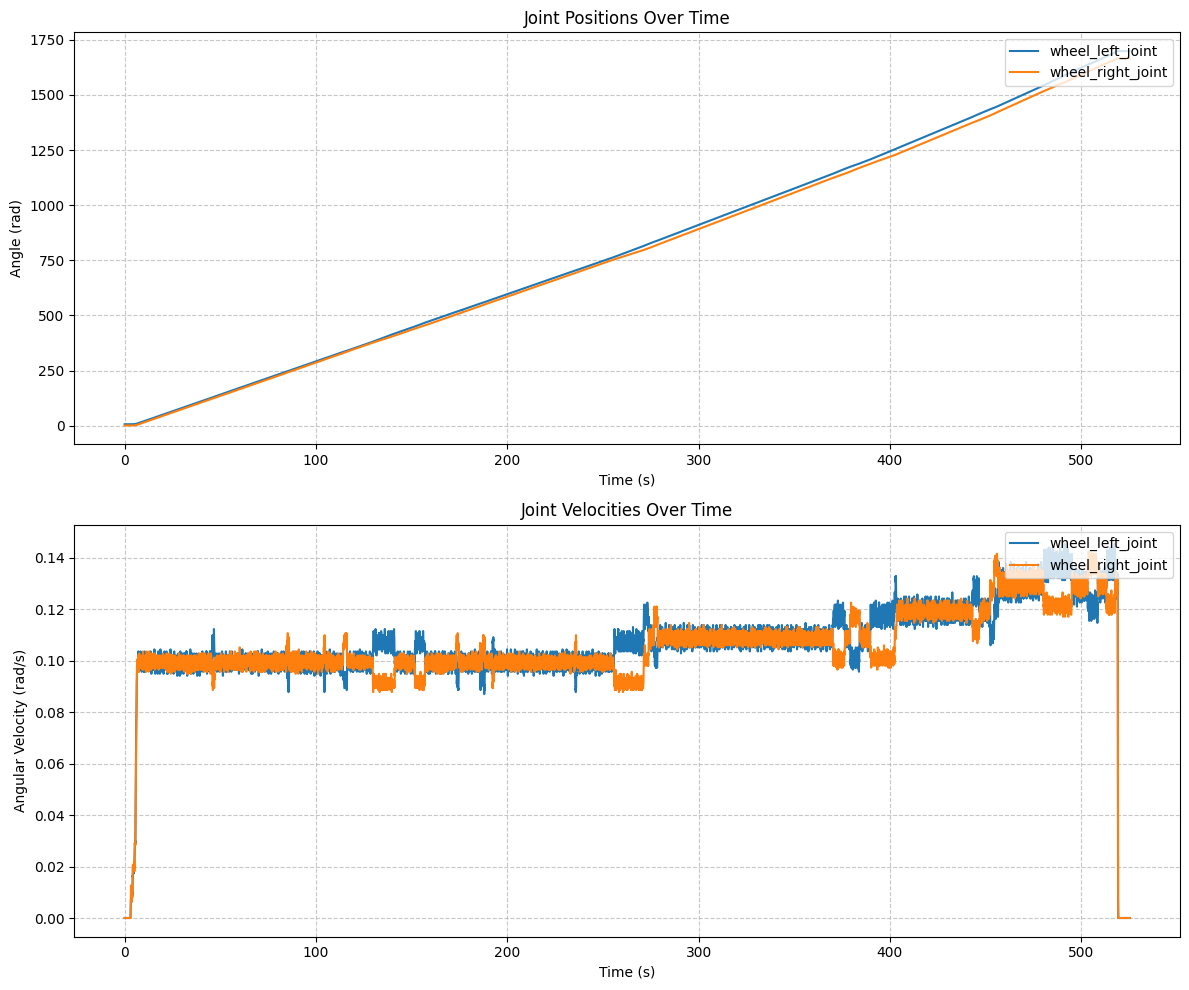

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

def robust_parse(val):
    if isinstance(val, str):
        try:
            # Clean up ROS string artifacts
            val = val.replace('array(', '').replace(')', '')
            return ast.literal_eval(val)
        except:
            return val
    return val

# 1. Prepare Data
df_j = seq0_joint_states.copy()
df_j['time'] = (df_j['timestamp'] - df_j['timestamp'].iloc[0]) / 1e9

# Ensure we are working with actual lists for both position and velocity
df_j['pos'] = df_j['position'].apply(robust_parse)
df_j['vel'] = df_j['velocity'].apply(robust_parse)

# 2. Fix the Array Creation for positions
# Using np.stack converts a list of lists into a proper 2D (N, M) numeric array
try:
    positions = np.stack(df_j['pos'].values)
except ValueError as e:
    print("Error: Ensure all rows in 'position' have the same number of joints.")
    # Fallback: if lengths vary, we must plot row by row or truncate
    positions = np.array(df_j['pos'].tolist(), dtype=object)

# 3. Fix the Array Creation for velocities
try:
    velocities = np.stack(df_j['vel'].values)
except ValueError as e:
    print("Error: Ensure all rows in 'velocity' have the same number of joints.")
    # Fallback: if lengths vary, we must plot row by row or truncate
    velocities = np.array(df_j['vel'].tolist(), dtype=object)

# 4. Get Joint Names
first_entry = df_j['name'].iloc[0]
joint_names = robust_parse(first_entry)

# 5. Create subplots for position and velocity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Positions
if positions.ndim == 2:
    for i, name in enumerate(joint_names):
        ax1.plot(df_j['time'], positions[:, i], label=name)
else:
    # Backup logic if stack failed
    for i, name in enumerate(joint_names):
        y_data = [p[i] if (isinstance(p, (list, np.ndarray)) and len(p) > i) else None for p in df_j['pos']]
        ax1.plot(df_j['time'], y_data, label=name)

ax1.set_title('Joint Positions Over Time')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Angle (rad)')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Velocities
if velocities.ndim == 2:
    for i, name in enumerate(joint_names):
        ax2.plot(df_j['time'], velocities[:, i], label=name)
else:
    # Backup logic if stack failed
    for i, name in enumerate(joint_names):
        y_data = [v[i] if (isinstance(v, (list, np.ndarray)) and len(v) > i) else None for v in df_j['vel']]
        ax2.plot(df_j['time'], y_data, label=name)

ax2.set_title('Joint Velocities Over Time')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Angular Velocity (rad/s)')
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

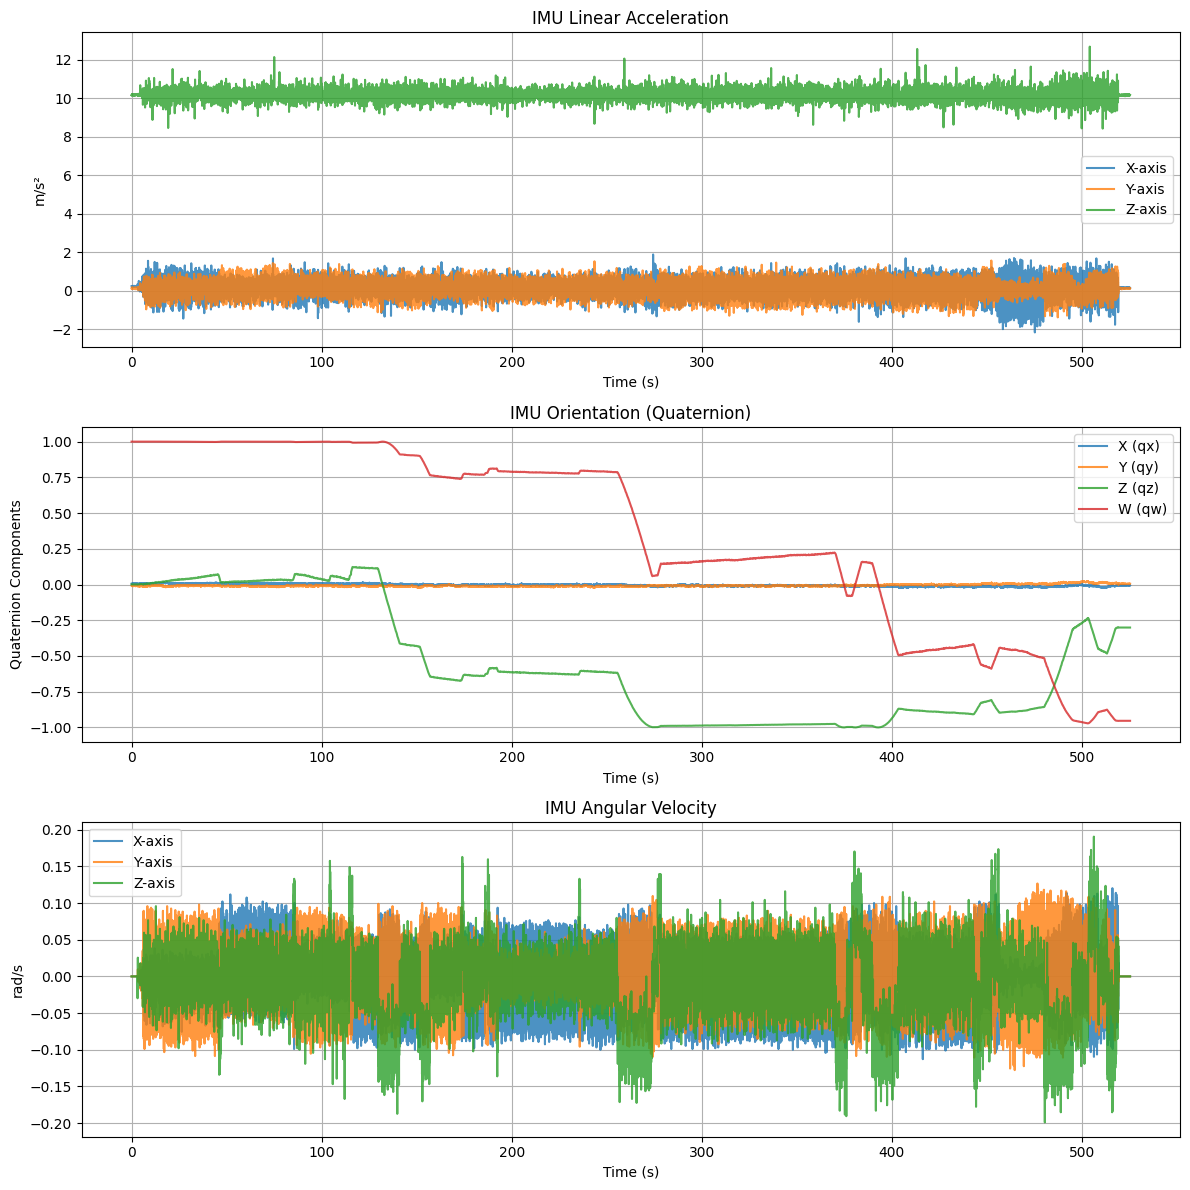

In [52]:
# --- Plot 2: IMU (Linear Acceleration, Orientation, Angular Velocity) ---
df_imu = seq0_imu.copy()
df_imu['time'] = (df_imu['timestamp'] - df_imu['timestamp'].iloc[0]) / 1e9

# Parse all IMU data
df_imu['accel'] = df_imu['linear_acceleration'].apply(robust_parse)
df_imu['orient'] = df_imu['orientation'].apply(robust_parse)
df_imu['ang_vel'] = df_imu['angular_velocity'].apply(robust_parse)

# Extract linear acceleration components
acc_x = [d.get('x') for d in df_imu['accel']]
acc_y = [d.get('y') for d in df_imu['accel']]
acc_z = [d.get('z') for d in df_imu['accel']]

# Extract orientation components (quaternion)
ori_x = [d.get('x') for d in df_imu['orient']]
ori_y = [d.get('y') for d in df_imu['orient']]
ori_z = [d.get('z') for d in df_imu['orient']]
ori_w = [d.get('w') for d in df_imu['orient']]

# Extract angular velocity components
vel_x = [d.get('x') for d in df_imu['ang_vel']]
vel_y = [d.get('y') for d in df_imu['ang_vel']]
vel_z = [d.get('z') for d in df_imu['ang_vel']]

# Create subplots for all IMU data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

# Plot Linear Acceleration
ax1.plot(df_imu['time'], acc_x, label='X-axis', alpha=0.8)
ax1.plot(df_imu['time'], acc_y, label='Y-axis', alpha=0.8)
ax1.plot(df_imu['time'], acc_z, label='Z-axis', alpha=0.8)
ax1.set_title('IMU Linear Acceleration')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('m/s²')
ax1.legend()
ax1.grid(True)

# Plot Orientation (Quaternion)
ax2.plot(df_imu['time'], ori_x, label='X (qx)', alpha=0.8)
ax2.plot(df_imu['time'], ori_y, label='Y (qy)', alpha=0.8)
ax2.plot(df_imu['time'], ori_z, label='Z (qz)', alpha=0.8)
ax2.plot(df_imu['time'], ori_w, label='W (qw)', alpha=0.8)
ax2.set_title('IMU Orientation (Quaternion)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Quaternion Components')
ax2.legend()
ax2.grid(True)

# Plot Angular Velocity
ax3.plot(df_imu['time'], vel_x, label='X-axis', alpha=0.8)
ax3.plot(df_imu['time'], vel_y, label='Y-axis', alpha=0.8)
ax3.plot(df_imu['time'], vel_z, label='Z-axis', alpha=0.8)
ax3.set_title('IMU Angular Velocity')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('rad/s')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

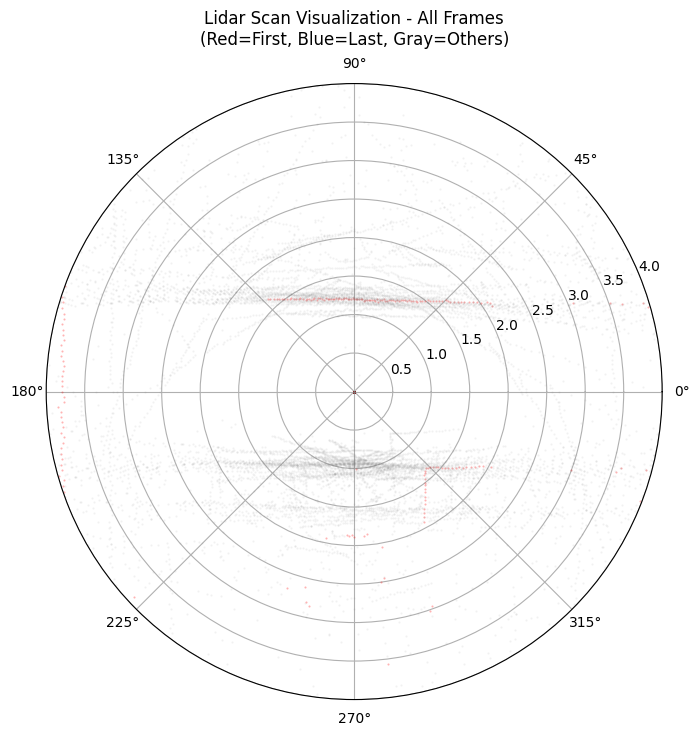

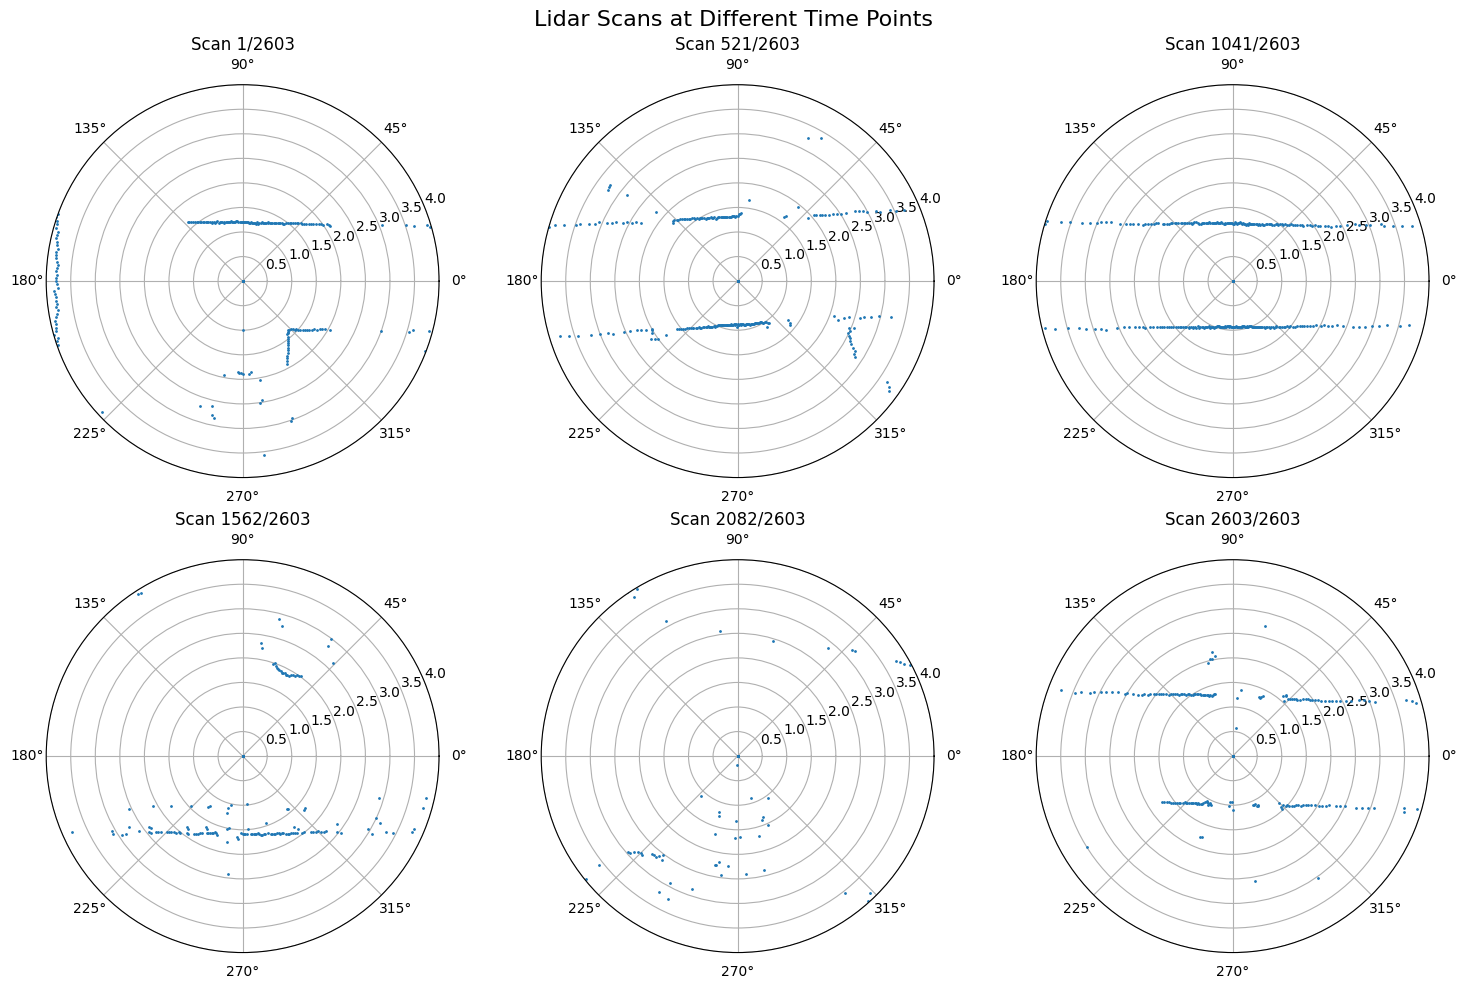

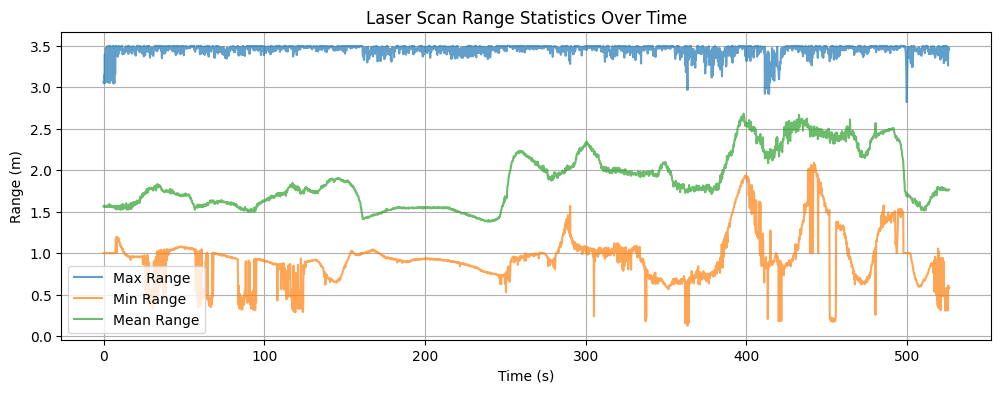

In [48]:
# --- Plot 3: Laser Scan (All Frames Overlaid) ---
df_scan = seq0_scan.copy()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Plot all scans with transparency
for i in range(0, len(df_scan), max(1, len(df_scan)//50)):  # Sample every nth scan to avoid overcrowding
    scan = df_scan.iloc[i]
    ranges = robust_parse(scan['ranges'])
    
    # Create angles based on laser specs
    angles = np.linspace(scan['angle_min'], scan['angle_max'], len(ranges))
    
    # Plot with transparency and color gradient
    alpha = 0.3 if i == 0 or i == len(df_scan)-1 else 0.1  # Highlight first and last
    color = 'red' if i == 0 else 'blue' if i == len(df_scan)-1 else 'gray'
    
    ax.plot(angles, ranges, '.', alpha=alpha, color=color, markersize=1)

ax.set_title("Lidar Scan Visualization - All Frames\n(Red=First, Blue=Last, Gray=Others)", va='bottom')
ax.set_ylim(0, 4)  # Set max range based on your sensor specs
plt.show()

# --- Alternative: Grid of Multiple Scans ---
fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(projection='polar'))
axes = axes.flatten()

# Plot 6 representative scans
scan_indices = np.linspace(0, len(df_scan)-1, 6, dtype=int)

for idx, ax in enumerate(axes):
    scan = df_scan.iloc[scan_indices[idx]]
    ranges = robust_parse(scan['ranges'])
    angles = np.linspace(scan['angle_min'], scan['angle_max'], len(ranges))
    
    ax.plot(angles, ranges, '.', markersize=2)
    ax.set_title(f"Scan {scan_indices[idx]+1}/{len(df_scan)}")
    ax.set_ylim(0, 4)

plt.suptitle("Lidar Scans at Different Time Points", fontsize=16)
plt.tight_layout()
plt.show()

# --- Animation-style: Show scan evolution in time sequence ---
plt.figure(figsize=(12, 4))

# Create time-based subplot
df_scan['time'] = (df_scan['timestamp'] - df_scan['timestamp'].iloc[0]) / 1e9

# Plot scan range statistics over time
max_ranges = []
min_ranges = []
mean_ranges = []

for i in range(len(df_scan)):
    ranges = robust_parse(df_scan.iloc[i]['ranges'])
    valid_ranges = [r for r in ranges if 0.12 <= r <= 3.5]  # Filter valid ranges
    if valid_ranges:
        max_ranges.append(max(valid_ranges))
        min_ranges.append(min(valid_ranges))
        mean_ranges.append(np.mean(valid_ranges))
    else:
        max_ranges.append(0)
        min_ranges.append(0)
        mean_ranges.append(0)

plt.plot(df_scan['time'], max_ranges, label='Max Range', alpha=0.7)
plt.plot(df_scan['time'], min_ranges, label='Min Range', alpha=0.7)
plt.plot(df_scan['time'], mean_ranges, label='Mean Range', alpha=0.7)

plt.title('Laser Scan Range Statistics Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Range (m)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
seq0_joint_states.head()

,timestamp,header,name,position,velocity,effort
0,1769097853143788217,"{'stamp': {'sec': 1769097853, 'nanosec': 19309...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
1,1769097853192825334,"{'stamp': {'sec': 1769097853, 'nanosec': 24305...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
2,1769097853242034466,"{'stamp': {'sec': 1769097853, 'nanosec': 29306...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
3,1769097853294050961,"{'stamp': {'sec': 1769097853, 'nanosec': 34305...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]
4,1769097853343274470,"{'stamp': {'sec': 1769097853, 'nanosec': 39305...","['wheel_left_joint', 'wheel_right_joint']","[6.154331772, 0.694893393]","[0.0, 0.0]",[]


In [34]:
seq0_scan.head()

,timestamp,header,angle_min,angle_max,angle_increment,time_increment,scan_time,range_min,range_max,ranges,intensities
0,1769097852273812619,"{'stamp': {'sec': 1769097852, 'nanosec': 32756...",0.0,6.265732,0.017453,0.000559,0.201342,0.12,3.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.0, 0.0,..."
1,1769097852475540393,"{'stamp': {'sec': 1769097852, 'nanosec': 52817...",0.0,6.265732,0.017453,0.000559,0.201342,0.12,3.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1769097852674957653,"{'stamp': {'sec': 1769097852, 'nanosec': 72890...",0.0,6.265732,0.017453,0.000559,0.201342,0.12,3.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.0, 0.0,..."
3,1769097852875437400,"{'stamp': {'sec': 1769097852, 'nanosec': 92957...",0.0,6.265732,0.017453,0.000559,0.201342,0.12,3.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.0, 0.0,..."
4,1769097853078013928,"{'stamp': {'sec': 1769097853, 'nanosec': 13028...",0.0,6.265732,0.017453,0.000559,0.201342,0.12,3.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 47.0, 0.0,..."


# Path

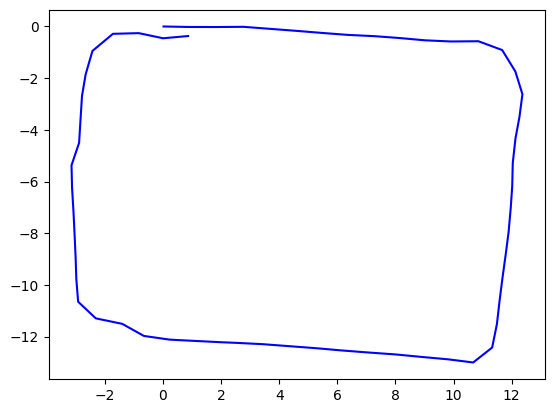

In [16]:
df = pd.read_csv(path + '/seq0_output/table_slam_(truth)_full_seq0.csv')
plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')

- seq00

Plotting: table_slam_(truth)_full_seq0.csv
Plotting: table_icp_full_seq0.csv
Plotting: table_ekf_full_seq0.csv
Plotting: table_wheel_(part3)_full_seq0.csv


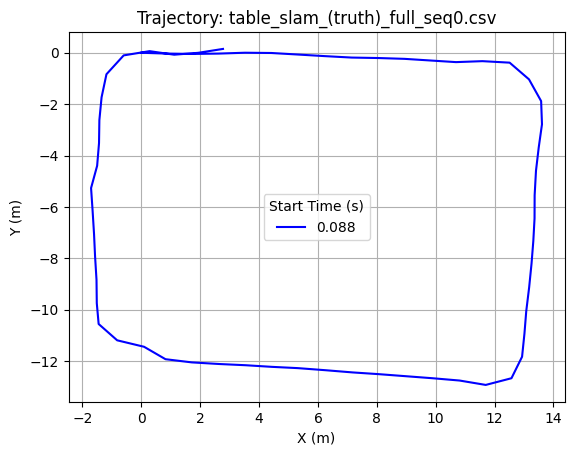

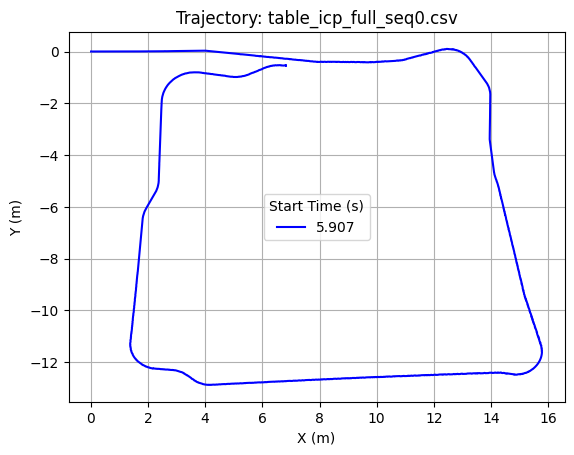

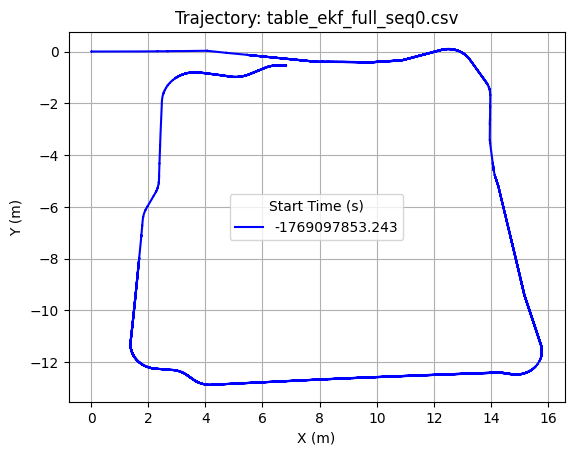

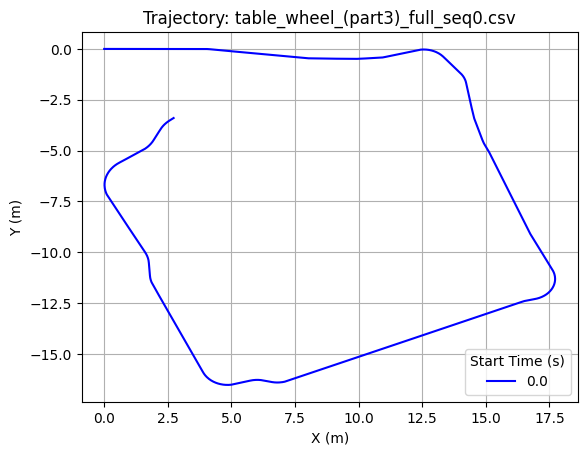

In [55]:
path = os.getcwd()
folder_path = os.path.join(path, 'data/seq0_v3_output')
seq0_output = os.listdir(folder_path)

for file_name in seq0_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        
        plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title(f'Trajectory: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)

# Calling show() once at the end will open all generated windows at once
plt.show()

- seq01

Plotting: table_ekf_full_seq1.csv
Plotting: table_slam_(truth)_full_seq1.csv
Plotting: table_icp_full_seq1.csv
Plotting: table_wheel_(part3)_full_seq1.csv


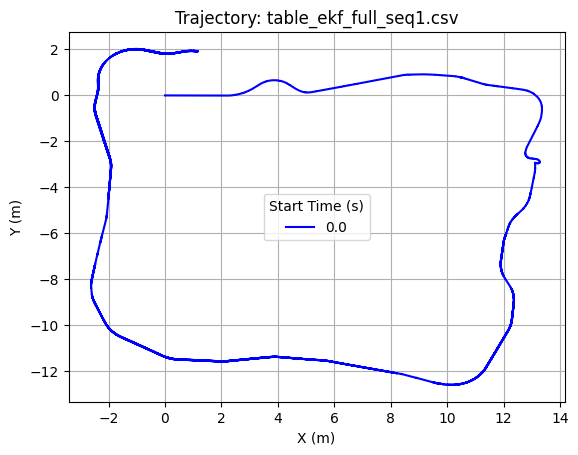

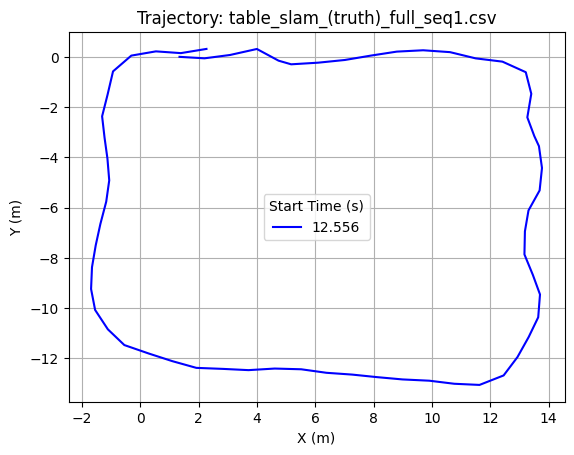

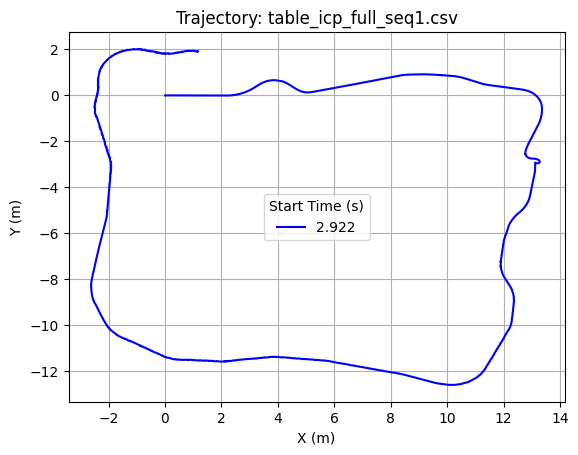

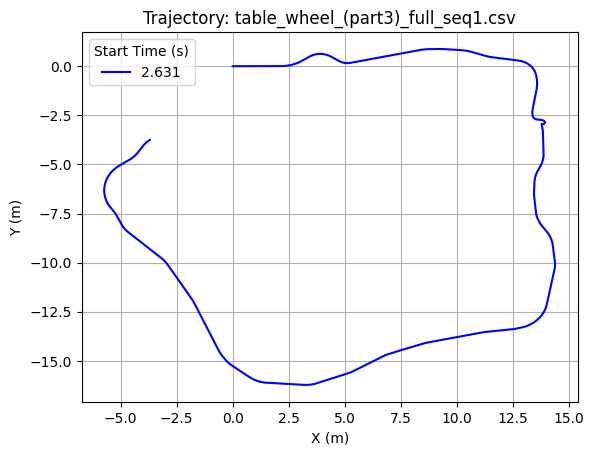

In [56]:
path = os.getcwd()
folder_path = os.path.join(path, 'data/seq1_v3_output')
seq1_output = os.listdir(folder_path)

for file_name in seq1_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        
        plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title(f'Trajectory: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)

# Calling show() once at the end will open all generated windows at once
plt.show()

Plotting: table_slam_(truth)_full_seq2.csv
Plotting: table_ekf_full_seq2.csv
Plotting: table_wheel_(part3)_full_seq2.csv
Plotting: table_icp_full_seq2.csv


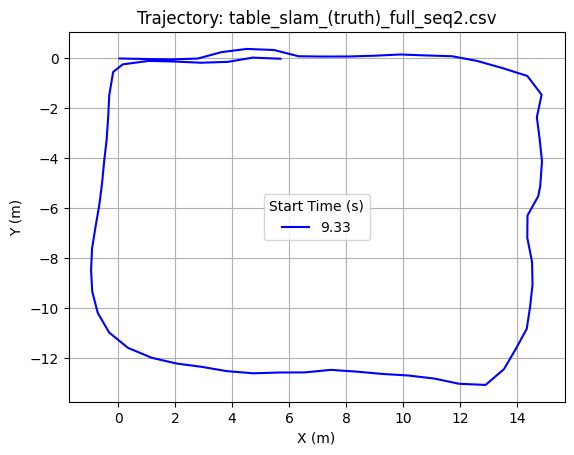

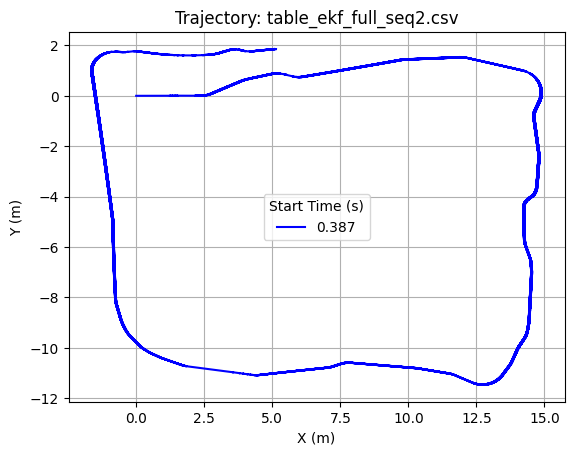

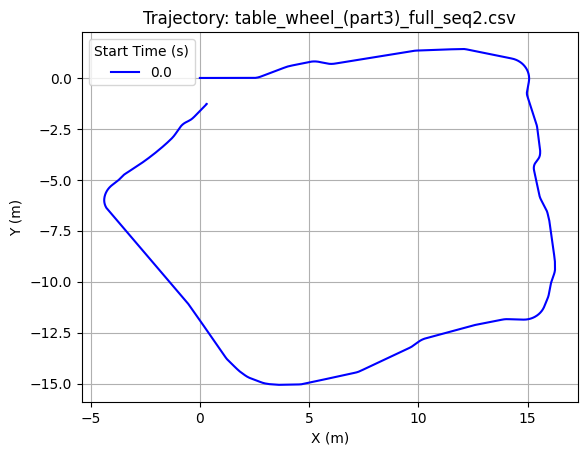

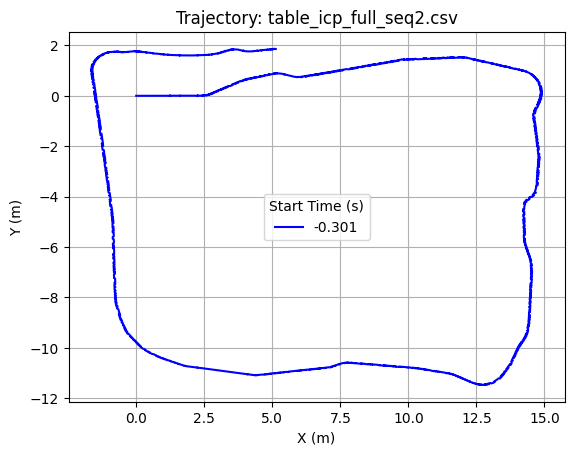

In [57]:
path = os.getcwd()
folder_path = os.path.join(path, 'data/seq2_v3_output')
seq1_output = os.listdir(folder_path)

for file_name in seq1_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        
        plt.plot(df['X (m)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title(f'Trajectory: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)

# Calling show() once at the end will open all generated windows at once
plt.show()

In [60]:
df = pd.read_csv(path + '/data/seq0_v3_output/table_ekf_full_seq0.csv')
df.head()

,Time (s),X (m),Y (m),Yaw (deg)
0,-1.769098e+09,0.0023,0.0,-0.05
1,-1.769098e+09,0.0039,-0.0,-0.07
2,-1.769098e+09,0.0017,0.0,-0.02
3,-1.769098e+09,0.0070,-0.0,-0.04
4,-1.769098e+09,0.0047,-0.0,0.01


Adding to plot: table_slam_(truth)_full_seq0.csv
Adding to plot: table_icp_full_seq0.csv
Adding to plot: table_ekf_full_seq0.csv
Adding to plot: table_wheel_(part3)_full_seq0.csv


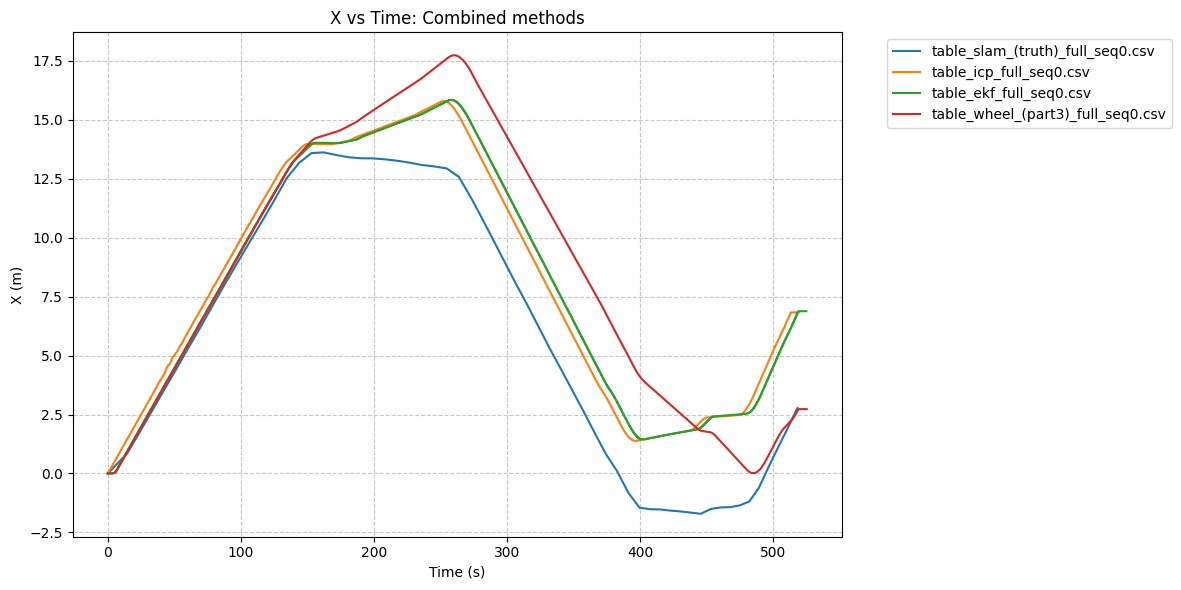

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = os.getcwd()
folder_path = os.path.join(path, 'data/seq0_v3_output')
seq0_output = os.listdir(folder_path)

# 1. Initialize the figure ONCE outside the loop
plt.figure(figsize=(12, 6)) 

for file_name in seq0_output:
    if file_name.endswith('.csv'):
        print(f"Adding to plot: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # 2. Normalize time (start from 0)
        df['Time (s)'] = df['Time (s)'] - df['Time (s)'].iloc[0]
        
        # 3. Plot on the shared axes. 
        # Use file_name as the label so you can distinguish them in the legend.
        plt.plot(df['Time (s)'], df['X (m)'], label=file_name)

# 4. Finalize the plot decorations outside the loop
plt.xlabel('Time (s)')
plt.ylabel('X (m)')
plt.title('X vs Time: Combined methods')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Moves legend outside if list is long
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 5. Show the single window containing all plots
plt.show()

Adding to plot: table_slam_(truth)_full_seq2.csv
Adding to plot: table_ekf_full_seq2.csv
Adding to plot: table_wheel_(part3)_full_seq2.csv
Adding to plot: table_icp_full_seq2.csv


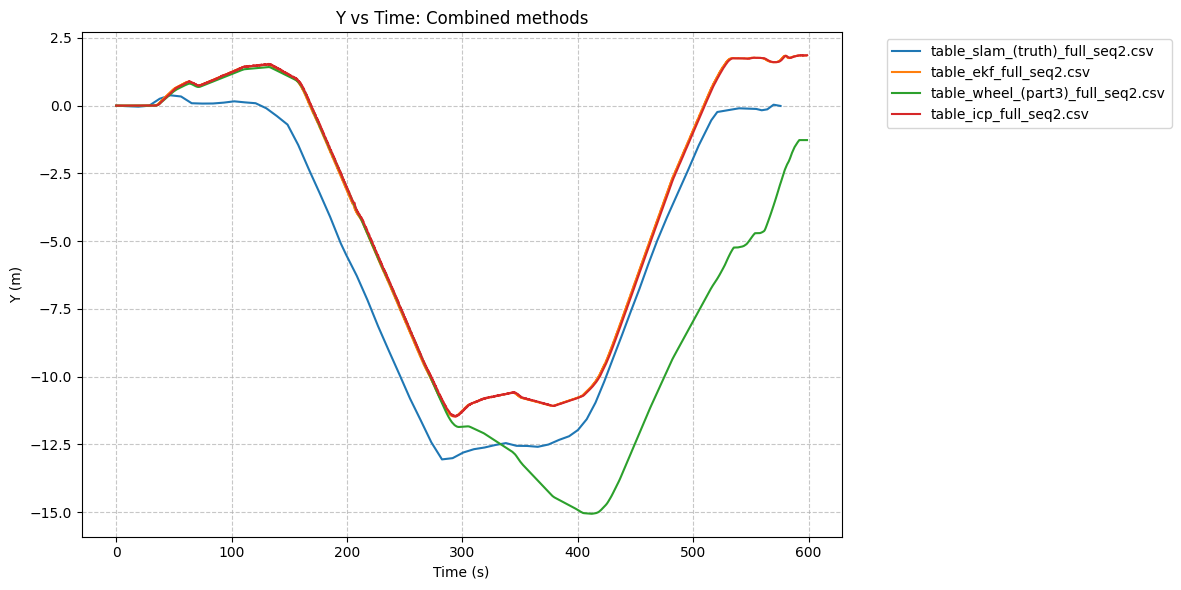

In [82]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = os.getcwd()
folder_path = os.path.join(path, 'data/seq2_v3_output')
seq0_output = os.listdir(folder_path)

# 1. Initialize the figure ONCE outside the loop
plt.figure(figsize=(12, 6)) 

for file_name in seq0_output:
    if file_name.endswith('.csv'):
        print(f"Adding to plot: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # 2. Normalize time (start from 0)
        df['Time (s)'] = df['Time (s)'] - df['Time (s)'].iloc[0]
        
        # 3. Plot on the shared axes. 
        # Use file_name as the label so you can distinguish them in the legend.
        plt.plot(df['Time (s)'], df['Y (m)'], label=file_name)

# 4. Finalize the plot decorations outside the loop
plt.xlabel('Time (s)')
plt.ylabel('Y (m)')
plt.title('Y vs Time: Combined methods')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Moves legend outside if list is long
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 5. Show the single window containing all plots
plt.show()

Adding to plot: table_slam_(truth)_full_seq2.csv
Adding to plot: table_ekf_full_seq2.csv
Adding to plot: table_wheel_(part3)_full_seq2.csv
Adding to plot: table_icp_full_seq2.csv


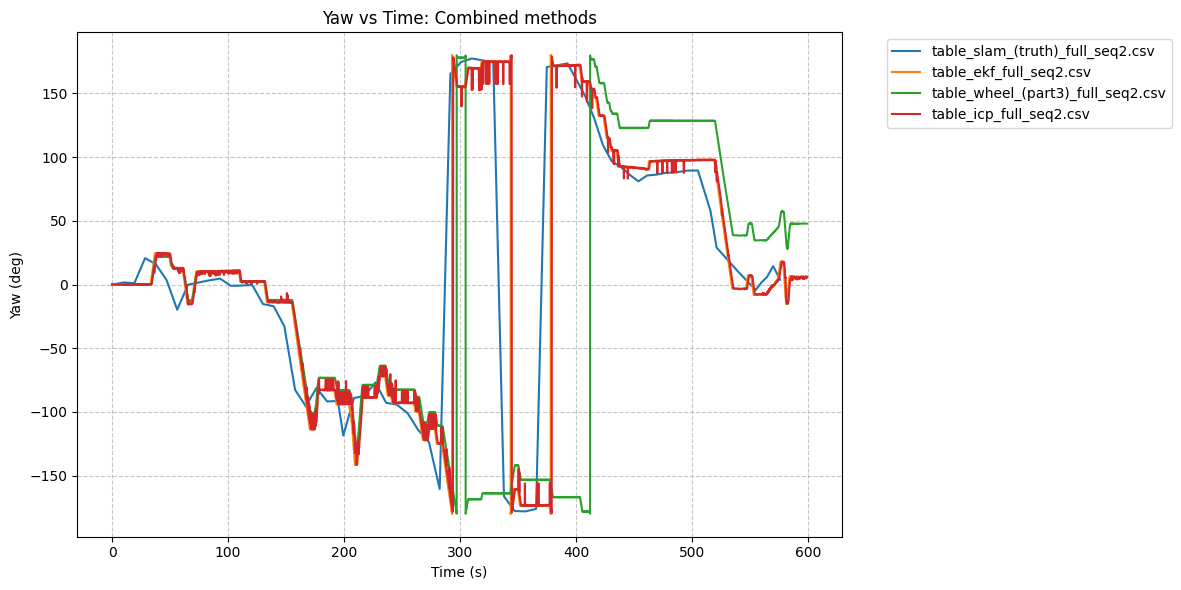

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = os.getcwd()
folder_path = os.path.join(path, 'data/seq2_v3_output')
seq0_output = os.listdir(folder_path)

# 1. Initialize the figure ONCE outside the loop
plt.figure(figsize=(12, 6)) 

for file_name in seq0_output:
    if file_name.endswith('.csv'):
        print(f"Adding to plot: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # 2. Normalize time (start from 0)
        df['Time (s)'] = df['Time (s)'] - df['Time (s)'].iloc[0]
        
        # 3. Plot on the shared axes. 
        # Use file_name as the label so you can distinguish them in the legend.
        plt.plot(df['Time (s)'], df['Yaw (deg)'], label=file_name)

# 4. Finalize the plot decorations outside the loop
plt.xlabel('Time (s)')
plt.ylabel('Yaw (deg)')
plt.title('Yaw vs Time: Combined methods')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Moves legend outside if list is long
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 5. Show the single window containing all plots
plt.show()

Plotting: table_slam_(truth)_full_seq2.csv
Plotting: table_ekf_full_seq2.csv
Plotting: table_wheel_(part3)_full_seq2.csv
Plotting: table_icp_full_seq2.csv


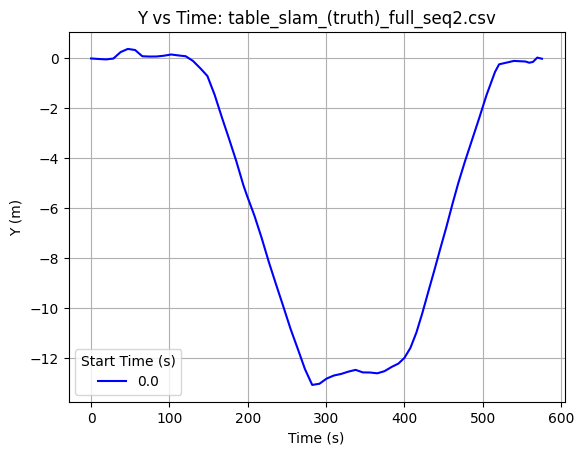

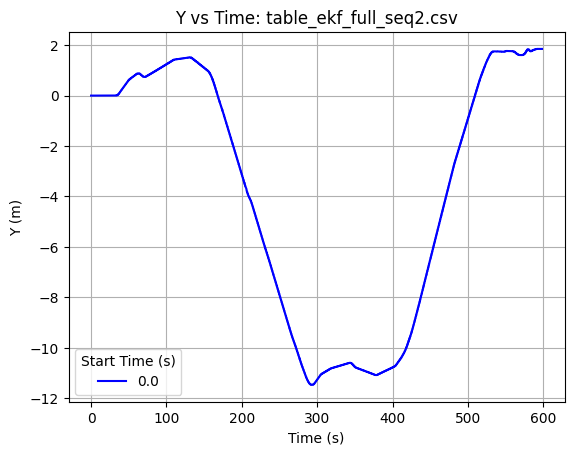

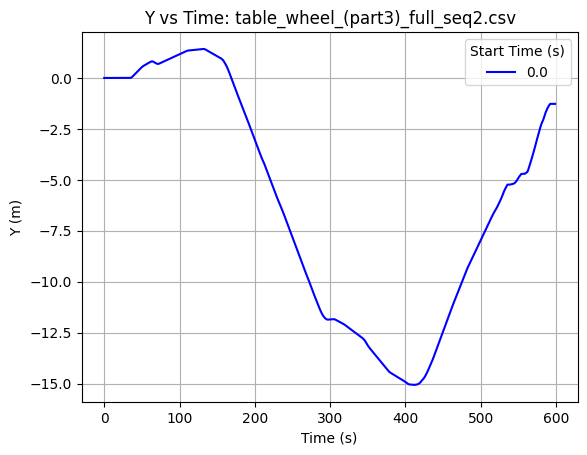

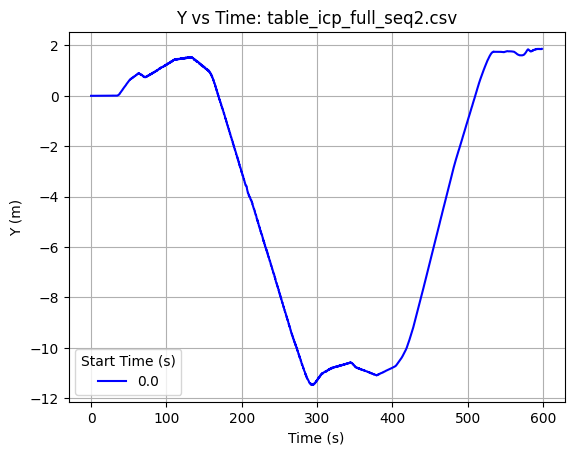

In [72]:
# plot x ant time
path = os.getcwd()
folder_path = os.path.join(path, 'data/seq2_v3_output')
seq0_output = os.listdir(folder_path)

for file_name in seq0_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        # make time start from 0
        df['Time (s)'] = df['Time (s)'] - df['Time (s)'].iloc[0]
        plt.plot(df['Time (s)'], df['Y (m)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('Time (s)')
        plt.ylabel('Y (m)')
        plt.title(f'Y vs Time: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)
# Calling show() once at the end will open all generated windows at once
plt.show()

Plotting: table_ekf_full_seq1.csv
Plotting: table_slam_(truth)_full_seq1.csv
Plotting: table_icp_full_seq1.csv
Plotting: table_wheel_(part3)_full_seq1.csv


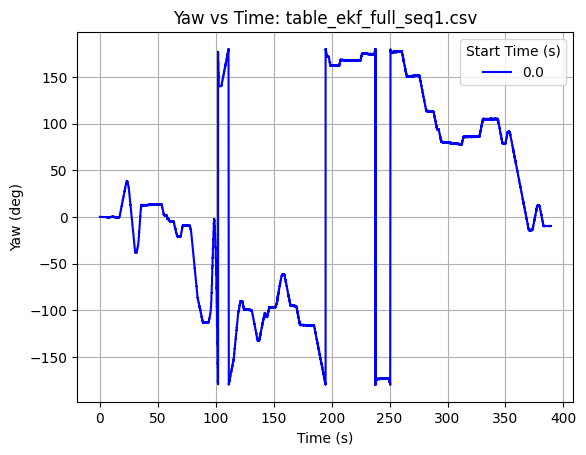

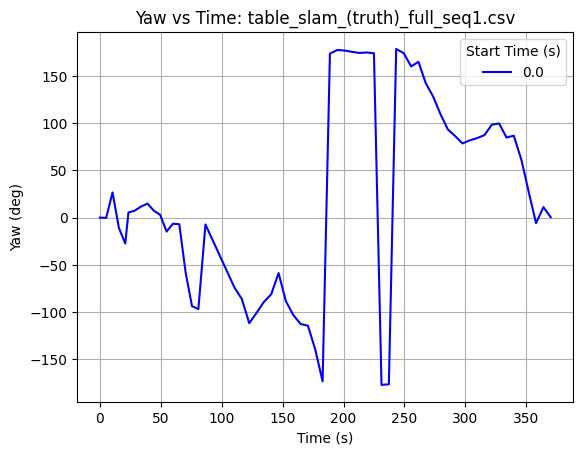

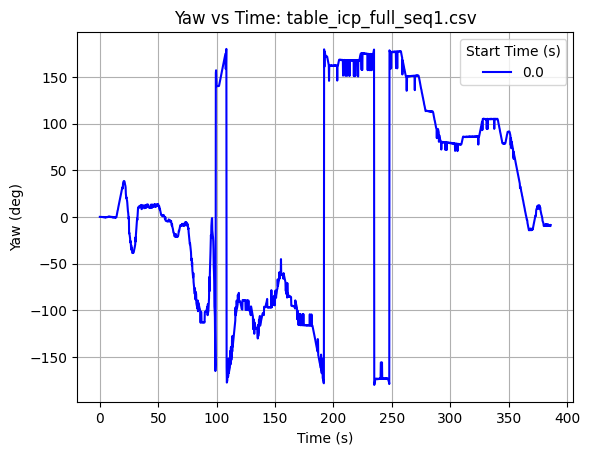

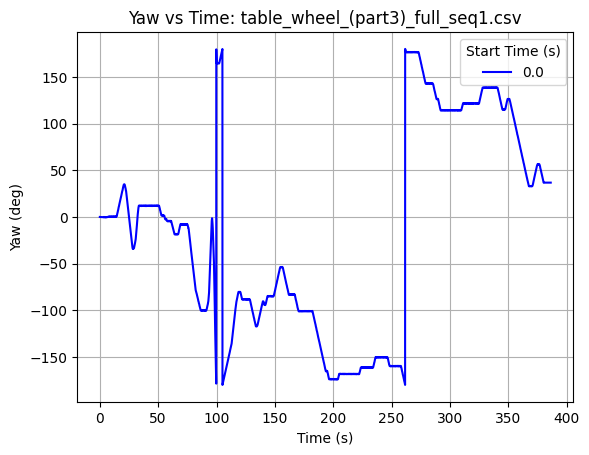

In [75]:
# plot x ant time
path = os.getcwd()
folder_path = os.path.join(path, 'data/seq1_v3_output')
seq0_output = os.listdir(folder_path)

for file_name in seq0_output:
    # It's safer to check if it's a CSV to avoid hidden system files
    if file_name.endswith('.csv'):
        print(f"Plotting: {file_name}")
        
        # Load data
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Create a NEW figure for every iteration
        plt.figure() 
        # make time start from 0
        df['Time (s)'] = df['Time (s)'] - df['Time (s)'].iloc[0]
        plt.plot(df['Time (s)'], df['Yaw (deg)'], label=df['Time (s)'].iloc[0], color='blue')
        plt.xlabel('Time (s)')
        plt.ylabel('Yaw (deg)')
        plt.title(f'Yaw vs Time: {file_name}')
        plt.legend(title='Start Time (s)')
        plt.grid(True)
# Calling show() once at the end will open all generated windows at once
plt.show()